# CLEANING AND DESCRIPTIVE DATA ANALYSIS
---

In [12]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils as eda

# URL
total_data = pd.read_csv(r'C:\Users\rnogu\OneDrive\Documentos\GitHub\Linear-regression-model\data\raw\total_data_raw.csv')

<small>Note: The 'utils.py' file contains **specific functions** according to the standards of Exploratory Data Analysis (EDA) and Descriptive Data Analysis (DDA). The functions with the prefix 'eda' are described in the 'utils.py' doc. <small>

### 1. General information about the dataset, including its shape, column names, presence of null entries, and data types:

In [13]:
total_data.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
# General info and shape
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1338 non-null   int64  
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   object 
 6   region      1338 non-null   object 
 7   charges     1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


The dataset has 8 columns and 1337 entries.
- numerical - 4
- categorical - 3
- target (numerical) 

This is the info of all variable included in the dataset:

0. **Unnamed: 0**. Index
1. **age**. Age of primary beneficiary (numeric)
2. **sex**. Gender of the primary beneficiary (categorical)
3. **bmi**. Body mass index (numeric)
4. **children**. Number of children/dependents covered by health insurance (numeric)
5. **smoker**. smoker (categorical)
6. **region**. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)
7. **charges**. Health insurance premium (numerical)

### 2. Information about measures of central tendency and dispersion:

In [15]:
# General description and data values 
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1338.0,668.500000,386.391641,0.0000,334.25000,668.500,1002.750000,1337.00000
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### 3. Check for duplicate values:
_Note: for this step, 'unnamed' was dropped in order to look for duplicate entries_

In [16]:
# Duplicates
total_data = total_data.drop(["Unnamed: 0"],axis=1)
total_data.duplicated().sum()

1

There is only 1 duplicated row.

In [18]:
# Drop duplicates
total_data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Without duplicates, there is a total of 1337 entries

### 4. Drop irrelevant columns for price calculation:

_Note: no columns were considered as 'irrelevant'_

### 5. Remove target variable entries with a value of 0:

_Note: there is no target entries with 0 value_

### 6. Review of the dataset with the applied modifications:

In [20]:
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 7. Histogram of data distribution for each numerical variable:

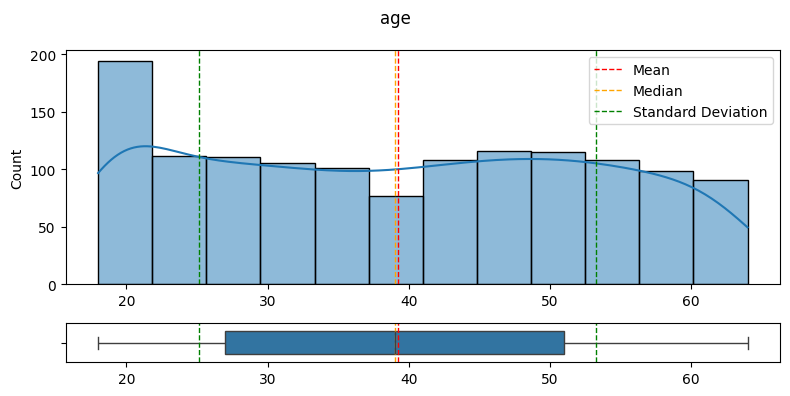

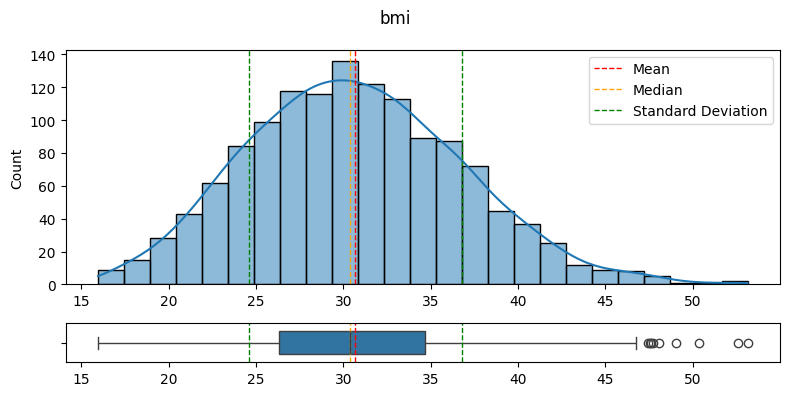

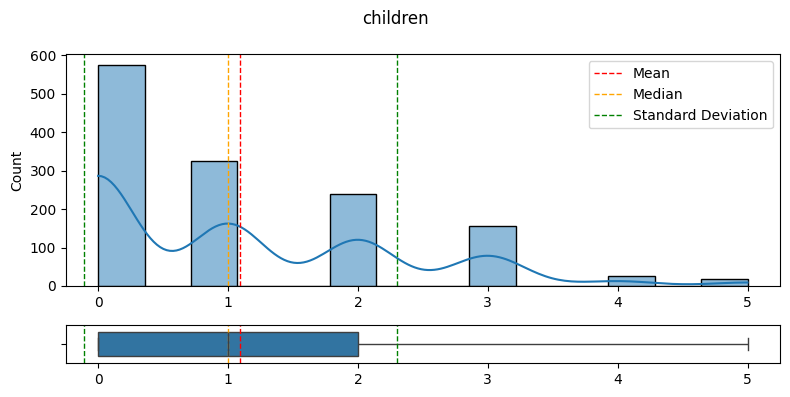

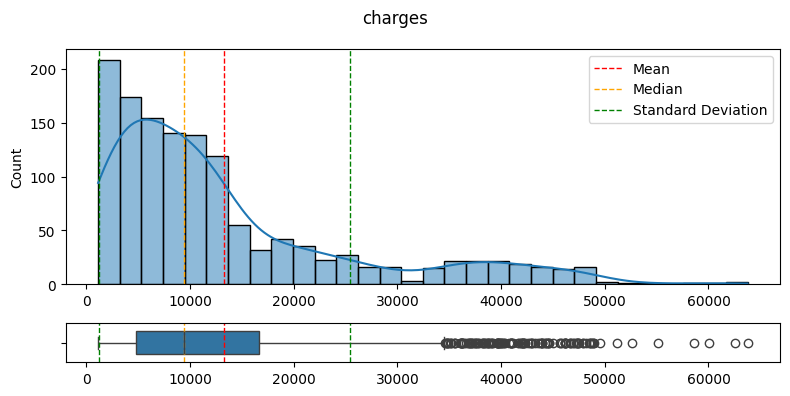

In [21]:
# Plot numerical variables to see values distribution (mean, median, std, outliers)
eda.plot_numerical_data(total_data)

The nurermical graphs shows that the distribution of the data seems to be the correct one. There is no statistical outliers due to data-entry mistakes. 

### 8. Histogram of data distribution for each categorical variable:

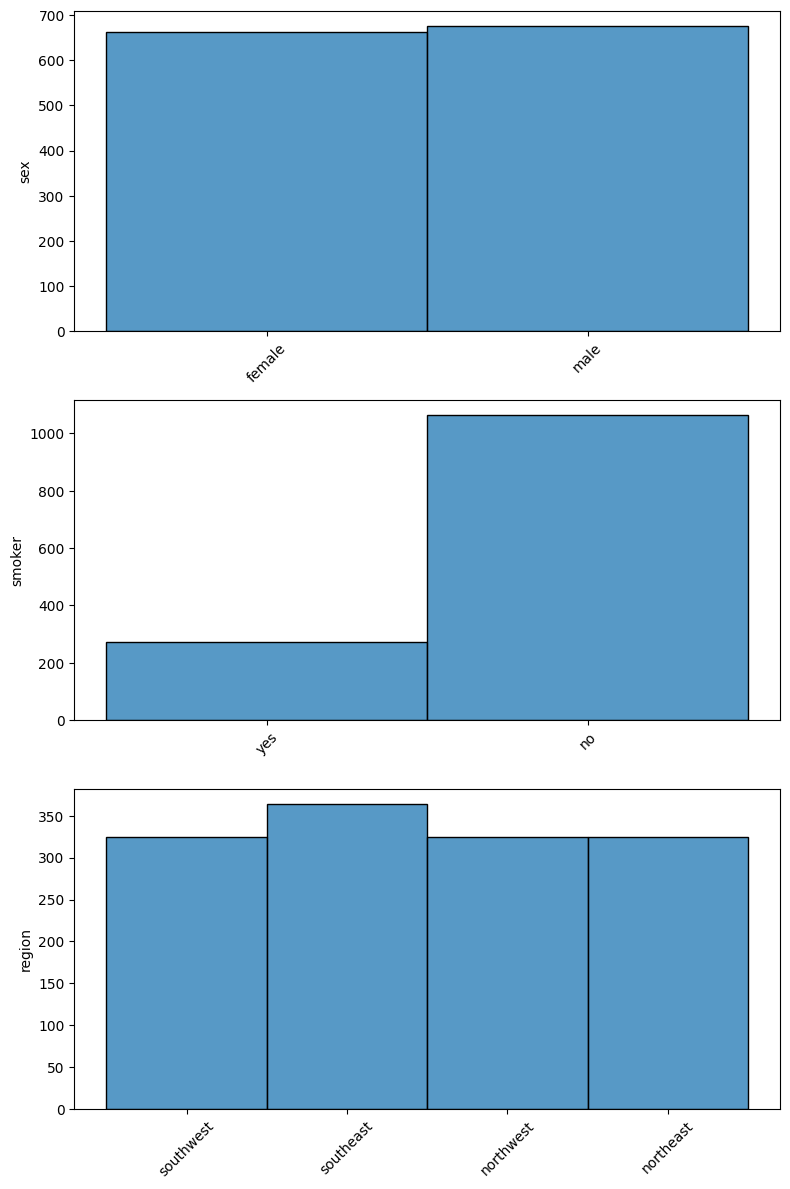

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_column_names = ["sex", "smoker", "region"]

# Calculate the number of rows needed based on the number of categorical columns
num_rows = len(categorical_column_names)

# Set up the subplots
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate over categorical columns and create histograms
for i, column in enumerate(categorical_column_names):
    sns.histplot(ax=axes[i], data=total_data, x=column, bins=len(total_data[column].unique()), kde=False)
    axes[i].set_ylabel(column)
    axes[i].set_xlabel(None)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()


The analysis allows to see that the records have no data-entry mistakes. Moreover, it is possible to see that, except from smoker, the data is quite balanced.

SAVE THE CLEANED DATA

In [25]:
# SAVE THE DATA
total_data.to_csv(r'C:\Users\rnogu\OneDrive\Documentos\GitHub\Linear-regression-model\data\interim\eda_total_data.csv',index= False)

---
## CONLCUSIONS

1. The dataset has 8 columns and 1337 rows. Also, has no null entries or data-entry mistakes.

2. The dataset had 1 duplicates entries; it has been dropped.

3. The dataset has 7 predictors (3 cat + 4 num). The target variable is numerical. 1 column (id) has been dropped, 7 are left.